In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
movie_df = pd.read_csv('movie_data.csv')

In [3]:
movie_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
movie_df.head(10)

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.6,2.010550e+08,11363000.0
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.0,1.637000e+08,40000000.0
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.0,8.246870e+07,14000000.0
3,tt8579674,1917,R,119,"Drama, War",8.4,2.004833e+08,100000000.0
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.1,4.844109e+07,18400000.0
5,tt5727208,Uncut Gems,R,135,"Crime, Drama, Thriller",7.6,4.794935e+07,0.0
6,tt7131622,Once Upon a Time... in Hollywood,R,161,"Comedy, Drama",7.7,3.742512e+08,95000000.0
7,tt7286456,Joker,R,122,"Crime, Drama, Thriller",8.6,1.073699e+09,55000000.0
8,tt1950186,Ford v Ferrari,PG-13,152,"Action, Biography, Drama",8.2,2.208030e+08,97600000.0
9,tt7975244,Jumanji: The Next Level,PG-13,123,"Action, Adventure, Comedy",6.8,3.108300e+08,125000000.0


In [37]:
movie_df['mpaa_rating'].value_counts()

R            806
PG-13        672
Not Rated    279
PG           234
TV-MA         15
G             14
TV-14          7
Unrated        7
NC-17          2
TV-PG          2
Approved       1
Name: mpaa_rating, dtype: int64

In [5]:
#filling all NA's as 0 to then change series to an integer
movie_df['runtime'].fillna(0, inplace=True)

In [6]:
#cleaning runtime column to just show minutes as integer
movie_df['runtime'] = movie_df['runtime'].astype(str)

In [7]:
movie_df['runtime'] = movie_df['runtime'].apply(lambda x: x.rstrip(' min'))

In [8]:
movie_df['runtime'] = movie_df['runtime'].astype(int)

In [9]:
movie_df['star_rating'].isnull().sum()

45

In [10]:
#clean all NAs for star rating to be 0.0, data type -- float
movie_df['star_rating'].fillna(0.0, inplace=True)

In [11]:
movie_df['star_rating'] = movie_df['star_rating'].astype(float)

In [12]:
movie_df['mpaa_rating'].fillna("Not Rated", inplace=True)

In [13]:
movie_df['genre'].fillna("No Genre", inplace=True)

In [26]:
movie_df['gross_revenue'].fillna(0, inplace=True)
movie_df = movie_df[movie_df['gross_revenue'] != 0]
movie_df.head()

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.6,201055038.0,11363000.0
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.0,163700000.0,40000000.0
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.0,82468705.0,14000000.0
3,tt8579674,1917,R,119,"Drama, War",8.4,200483309.0,100000000.0
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.1,48441089.0,18400000.0


In [28]:
movie_df['budget'].fillna(0, inplace=True)
movie_df = movie_df[movie_df['budget'] != 0]
movie_df

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.6,201055038.0,11363000.0
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.0,163700000.0,40000000.0
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.0,82468705.0,14000000.0
3,tt8579674,1917,R,119,"Drama, War",8.4,200483309.0,100000000.0
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.1,48441089.0,18400000.0
...,...,...,...,...,...,...,...,...
9879,tt1396208,Action Replayy,Not Rated,129,"Comedy, Romance, Sci-Fi",4.2,5000000.0,10000000.0
9891,tt2357926,Ramaiya Vastavaiya,Not Rated,148,"Action, Drama, Romance",5.6,7300000.0,4600000.0
9918,tt2635622,The Attacks of 26/11,Not Rated,116,"Action, Crime, History",6.8,18000000.0,3300000.0
9927,tt1130964,The 5th Quarter,PG-13,90,"Biography, Drama, Sport",5.6,399611.0,6000000.0


In [29]:
#how many movies belong in each genre -- creating a new data frame
genre_list = []
for genres in movie_df['genre']:
    genre_list.extend(genre.strip() for genre in genres.split(','))
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
print(genre_dict)
    

{'Comedy': 693, 'Drama': 1111, 'Thriller': 372, 'Crime': 333, 'War': 33, 'Action': 662, 'Biography': 178, 'Adventure': 460, 'History': 88, 'Horror': 224, 'Mystery': 180, 'Animation': 144, 'Romance': 286, 'Fantasy': 173, 'Sci-Fi': 165, 'Music': 54, 'Family': 107, 'Western': 10, 'Musical': 13, 'Sport': 34}


In [30]:
len(list(genre_dict.keys()))

20

In [20]:
movie_df['star_rating'].mean()

5.956549999999996

In [21]:
movie_df['star_rating'].median()

6.1

In [33]:
test = movie_df.groupby(['genre'])
test['star_rating'].mean()

genre
Action                          5.383333
Action, Adventure               6.766667
Action, Adventure, Biography    7.150000
Action, Adventure, Comedy       6.388095
Action, Adventure, Crime        6.272727
                                  ...   
Mystery, Thriller               7.800000
Romance                         7.700000
Romance, Sci-Fi, Thriller       7.000000
Sci-Fi, Thriller                7.400000
Thriller                        5.300000
Name: star_rating, Length: 238, dtype: float64

In [38]:
# top_rated_genre_list = []
# for genres in df_highest_rated['genre']:
#     top_rated_genre_list.extend(genre.strip() for genre in genres.split(','))
#     genre_dict = {}
#     for genre in top_rated_genre_list:
#         if genre in genre_dict:
#             genre_dict[genre] += 1
#         else:
#             genre_dict[genre] = 1
# #print(genre_dict)


In [39]:
genre_df_dict = {'genre': list(genre_dict.keys()), 'count': list(genre_dict.values())}
genre_df = pd.DataFrame(genre_df_dict)
genre_df

,genre,count
0,Comedy,693
1,Drama,1111
2,Thriller,372
3,Crime,333
4,War,33
5,Action,662
6,Biography,178
7,Adventure,460
8,History,88
9,Horror,224


In [41]:
#add rating to genre_df
unique_genres = list(genre_dict.keys())
genre_rating_dict = {}
for index, row in movie_df.iterrows():
     for genre in unique_genres:
            if genre in row['genre']:
                rating = row['star_rating']
                if genre in genre_rating_dict:
                    genre_rating_dict[genre] += rating
                else:
                    genre_rating_dict[genre] = rating

genre_df['rating_sum'] = list(genre_rating_dict.values())
genre_df['rating_average'] = round(genre_df['rating_sum']/genre_df['count'], 2)
genre_df.drop(columns=['rating_sum'], inplace=True)
genre_df

,genre,count,rating_average
0,Comedy,693,6.33
1,Drama,1111,6.67
2,Thriller,372,6.30
3,Crime,333,6.50
4,War,33,6.83
5,Action,662,6.39
6,Biography,178,7.05
7,Adventure,460,6.45
8,History,88,6.89
9,Horror,224,5.90


In [42]:
#add revenue to genre_df
genre_revenue_dict = {}
for index, row in movie_df.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            revenue = row['gross_revenue']
            if genre in genre_revenue_dict:
                genre_revenue_dict[genre] += revenue
            else:
                genre_revenue_dict[genre] = revenue
                
genre_df['revenue_sum'] = list(genre_revenue_dict.values())
genre_df['revenue_average'] = round(genre_df['revenue_sum']/genre_df['count'])
genre_df.drop(columns=['revenue_sum'], inplace=True)
genre_df

,genre,count,rating_average,revenue_average
0,Comedy,693,6.33,119642388.0
1,Drama,1111,6.67,69217944.0
2,Thriller,372,6.30,100319108.0
3,Crime,333,6.50,54944306.0
4,War,33,6.83,27614798.0
5,Action,662,6.39,207090932.0
6,Biography,178,7.05,75411057.0
7,Adventure,460,6.45,338823701.0
8,History,88,6.89,66010524.0
9,Horror,224,5.90,68107796.0


In [44]:
genre_df.sort_values(by=['revenue_average'], ascending=False, inplace=True)
genre_df.reset_index(drop=True, inplace=True)
genre_df

,genre,count,rating_average,revenue_average
0,Adventure,460,6.45,338823701.0
1,Sci-Fi,165,6.46,326686014.0
2,Animation,144,6.61,313909898.0
3,Fantasy,173,6.22,222332205.0
4,Family,107,6.10,214217500.0
5,Action,662,6.39,207090932.0
6,Musical,13,6.69,189202890.0
7,Music,54,7.91,122343843.0
8,Comedy,693,6.33,119642388.0
9,Western,10,6.75,101423712.0


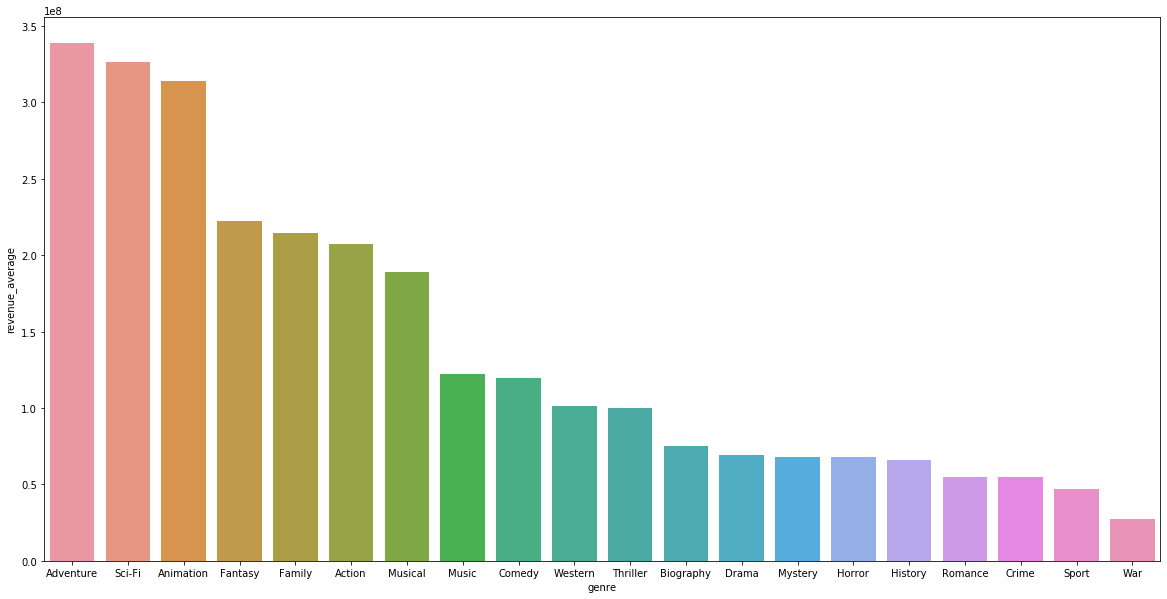

In [45]:
fig, ax1 = plt.subplots(figsize=(20,10))
sns.barplot(genre_df['genre'], genre_df['revenue_average'])

In [47]:
top_genres_df = genre_df.iloc[:11].copy()
top_genres_df

,genre,count,rating_average,revenue_average
0,Adventure,460,6.45,338823701.0
1,Sci-Fi,165,6.46,326686014.0
2,Animation,144,6.61,313909898.0
3,Fantasy,173,6.22,222332205.0
4,Family,107,6.10,214217500.0
5,Action,662,6.39,207090932.0
6,Musical,13,6.69,189202890.0
7,Music,54,7.91,122343843.0
8,Comedy,693,6.33,119642388.0
9,Western,10,6.75,101423712.0


In [49]:
# df['mpaa_rating'].value_counts()

In [50]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.barplot(list(genre_dict.keys()), list(genre_dict.values()))